### PyTorch

Let **weights** be a tensor

* `weights.reshape(a, b)` will return a new tensor with the same data(points to the same memory location) as `weights` with size `(a, b)` sometimes, and sometimes a clone, as in it copies the data to another part of memory.
* `weights.resize_(a, b)` returns the same tensor with a different shape. However, if the new shape results in fewer elements than the original tensor, some elements will be removed from the tensor (but not from memory). If the new shape results in more elements than the original tensor, new elements will be uninitialized in memory. Here I should note that the underscore at the end of the method denotes that this method is performed **in-place**. Here is a great forum thread to [read more about in-place operations](https://discuss.pytorch.org/t/what-is-in-place-operation/16244) in PyTorch.
* `weights.view(a, b)` will return a new tensor with the same data as `weights` with size `(a, b)`.


In [6]:
import torch

x = torch.randn(1)
y = torch.randn(1)

print(x, y)
print(f'id(x): {id(x)}, id(y): {id(y)}')

tensor([0.4333]) tensor([-1.3594])
x: 2659434368240, y: 2659434368744


In [7]:
x = x + y # Normal operation 
print(f'x = {x} id(x) = {id(x)}') # New location for x

x = tensor([-0.9262]) id(x) = 2659434365432


In [8]:
x += y # inplace operation
print(f'x = {x} id(x) = {id(x)}') # existing location used(in-place)

x = tensor([-2.2856]) id(x) = 2659434365432


In [9]:
x.add_(y) # inplace operation
print(f'x = {x} id(x) = {id(x)}') # existing location used(in-place)

x = tensor([-3.6450]) id(x) = 2659434365432


**Inplace operations in pytorch are always postfixed with a _ , like .add_() or .scatter_(). Python operations like += or *= are also inplace operations.**
<hr>

## Numpy to Torch and back

Special bonus section! PyTorch has a great feature for converting between Numpy arrays and Torch tensors. To create a tensor from a Numpy array, use `torch.from_numpy()`. To convert a tensor to a Numpy array, use the `.numpy()` method.

In [10]:
import numpy as np
a = np.random.rand(4,3)
a

array([[0.30467821, 0.16646286, 0.15526558],
       [0.80200092, 0.76872907, 0.01923306],
       [0.87637473, 0.64626048, 0.55101986],
       [0.5537705 , 0.03527895, 0.62079543]])

In [11]:
b = torch.from_numpy(a)
b

tensor([[0.3047, 0.1665, 0.1553],
        [0.8020, 0.7687, 0.0192],
        [0.8764, 0.6463, 0.5510],
        [0.5538, 0.0353, 0.6208]], dtype=torch.float64)

In [12]:
b.numpy()

array([[0.30467821, 0.16646286, 0.15526558],
       [0.80200092, 0.76872907, 0.01923306],
       [0.87637473, 0.64626048, 0.55101986],
       [0.5537705 , 0.03527895, 0.62079543]])

The memory is shared between the Numpy array and Torch tensor, so if you change the values in-place of one object, the other will change as well.

In [13]:
# Multiply PyTorch Tensor by 2, in place
b.mul_(2)

tensor([[0.6094, 0.3329, 0.3105],
        [1.6040, 1.5375, 0.0385],
        [1.7527, 1.2925, 1.1020],
        [1.1075, 0.0706, 1.2416]], dtype=torch.float64)

In [14]:
# Numpy array matches new values from Tensor
a

array([[0.60935641, 0.33292571, 0.31053115],
       [1.60400185, 1.53745814, 0.03846612],
       [1.75274946, 1.29252097, 1.10203971],
       [1.107541  , 0.07055789, 1.24159087]])

<hr>

## Getting datasets

In [15]:
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

We have the training data loaded into `trainloader` and we make that an iterator with `iter(trainloader)`. Later, we'll use this to loop through the dataset for training, like

```python
for image, label in trainloader:
    ## do things with images and labels
```

You'll notice I created the `trainloader` with a batch size of 64, and `shuffle=True`. The batch size is the number of images we get in one iteration from the data loader and pass through our network, often called a *batch*. And `shuffle=True` tells it to shuffle the dataset every time we start going through the data loader again. But here I'm just grabbing the first batch so we can check out the data. We can see below that `images` is just a tensor with size `(64, 1, 28, 28)`. So, 64 images per batch, 1 color channel, and 28x28 images.

In [16]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


In [18]:
inputs = images.view(images.shape[0], -1)
inputs.shape

torch.Size([64, 784])

Build a multi-layer network with 784 input units, 256 hidden units, and 10 output units using random tensors for the weights and biases. For now, use a sigmoid activation for the hidden layer and leave the output without one.

In [21]:
## Your solution
np.random.seed(7)

def activation(x):
    return 1 / (1 + torch.exp(-x)) # or np.exp(-x)

# Flatten the input image
inputs = images.view(images.shape[0], -1)# or images.view(64, 784)

# Set network layer sizes
n_input = inputs.shape[1] # 784
n_hidden = 256
n_output = 10

# Create parameters
W1 = torch.randn(n_input, n_hidden) # weights for the hidden layer- 784X256
W2 = torch.randn(n_hidden, n_output) # weights for the output layer- 256X10

B1 = torch.randn(1, n_hidden) # biases for the hidden layer- 1X256
B2 = torch.randn(1, n_output) # biases for the output layer- 1X10

# output of hidden layer- 64X256 ie 1X256 values for 64 images in the batch
# torch.mm(inputs, W1)- 64X256
# even though B1 is of shape 1X256, it broadcasts to 64X256 when made to add with a 64X256 matrix
h = activation(torch.mm(inputs, W1) + B1) 

# torch.mm(h, W2)- 64X10
# B2 broadcasts from 1X10 to 64X10 on addition with a 64X10 matrix
out = torch.mm(h, W2) + B2 # network output- 64X10 ie 10 output values for each of 64 images

print(out.shape)
print(out)

torch.Size([64, 10])
tensor([[-3.2193e+00, -1.7023e+01, -1.3395e+01,  3.6186e+00,  2.2172e+01,
         -2.5518e+01,  1.1408e+01, -6.8785e+00, -7.0721e+00, -4.2442e+00],
        [ 7.1757e+00, -6.8673e+00, -5.8979e+00,  5.9031e+00,  1.2552e+01,
         -2.3809e+01,  1.6297e+01, -1.0659e+01, -3.8191e+00, -6.6499e+00],
        [ 3.7525e+00, -3.2684e+00, -7.5519e+00,  1.2205e+01,  8.7440e+00,
         -1.8315e+01,  5.4285e+00, -1.2586e+00, -6.3982e+00, -8.1119e+00],
        [-1.5672e+00, -1.2791e+01, -5.9504e+00,  8.0067e+00,  8.8310e+00,
         -1.1849e+01,  1.5828e+01, -4.0509e+00,  8.5285e-01,  6.4194e-01],
        [ 2.2889e+00, -5.7570e+00,  9.4711e-01,  6.7611e+00,  1.5003e+01,
         -2.2965e+01,  4.1218e+00, -7.5616e+00, -1.9083e+01, -1.4526e+00],
        [ 8.2334e+00, -2.2868e+00, -1.2525e+01,  9.6182e+00,  9.3221e+00,
         -2.2471e+01,  1.5176e+01, -1.1543e+01, -4.0032e+00, -4.7276e+00],
        [ 4.1577e+00,  3.3112e-01, -6.7389e+00,  8.2080e+00,  1.8484e+01,
         -1

         -2.4220e+01,  1.7294e+01,  2.8112e+00, -3.1712e+00, -1.2298e+01]])


In [25]:
def softmax(x):
    num = torch.exp(x)
    den = torch.sum(torch.exp(x), dim=1).view(-1, 1) # change shape from (64, ) to (64, 1).
    return num/den

# Here, out should be the output of the network in the previous excercise with shape (64,10)
probabilities = softmax(out)

# Does it have the right shape? Should be (64, 10)
print(probabilities.shape)
# Does it sum to 1?
print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


In [26]:
den = torch.sum(torch.exp(out), dim=1)
den.shape

torch.Size([64])

**torch.Size([64])** ~ **numpy (64, )** it is considered to be **(1, 64)** during broadcasting.

So if we divide (64, 10) the numerator with (64, ), python will try to broadcast to make the tensors of same size.
(64, ) to (1, 64) to ?

(64, 10) and (1, 64) can't be broadcasted to equal size and python outputs error.

Now if we reshape (64, ) to (64, 1), the broadcasting goes like this,
(64, 1) to (64, 10)

Now, (64, 10) the numerator and (64, 10) the broadcasted denominator can be divided

<hr>

### Creating ready-made NN

In [27]:
## Your solution here
from torch import nn
import torch.nn.functional as f

# 3 layer NN
class Network3L(nn.Module):
    def __init__(self):
        super().__init__()

        # first fc hidden layer
        self.fc1 = nn.Linear(784, 128)

        # second fc hidden layer
        self.fc2 = nn.Linear(128, 64)

        # fc output layer
        self.fc3 = nn.Linear(64, 10)
    
    def forward(self, x):
        h1 = F.relu(self.fc1(x)) # output of first hidden layer
        h2 = F.relu(self.fc2(h1)) # output of second hidden layer
        out = F.sigmoid(self.fc3(h2)) # neural network output
        
model = Network3L()
model

Network3L(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [28]:
print(model.fc1.weight.shape, model.fc1.bias.shape)

torch.Size([128, 784]) torch.Size([128])


<hr>

### Using `nn.Sequential`

PyTorch provides a convenient way to build networks like this where a tensor is passed sequentially through operations, `nn.Sequential` ([documentation](https://pytorch.org/docs/master/nn.html#torch.nn.Sequential)). Using this to build the equivalent network:

In [ ]:
# Hyperparameters for our network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
print(model)

# Forward pass through the network and display output
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])

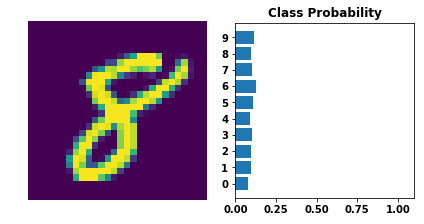

In [80]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(6, 9))

ax[0].imshow(images[0].view(28, 28))
ax[0].axis('off')

ax[1].barh(np.arange(10), ps.data.numpy().squeeze())
ax[1].set_aspect(0.1)
ax[1].set_xlim(0, 1.1)
ax[1].set_yticks(np.arange(10))
ax[1].set_yticklabels(np.arange(10))
ax[1].set_title('Class Probability')

plt.tight_layout()
#helper.view_classify(images[0].view(1, 28, 28), ps)